# PRÁCTICA ML 

Primero cargo librerías que voy a utilizar más adelante

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline 

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

Cargo y leo el dataset

In [2]:
airbnb = pd.read_csv("./airbnb-listings-extract.csv", sep=";")
airbnb.head(8)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."
5,15695269,https://www.airbnb.com/rooms/15695269,20170407214050,2017-04-08,55. Valencia II Apartment,"Unique apartment in vibrant neighborhoods, car...",This fully refurbished apartment has 2 bedroom...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,92.0,NaN,"41.3825366724,2.14957707323","Host Has Profile Pic,Host Identity Verified,Is..."
6,1295958,https://www.airbnb.com/rooms/1295958,20170407214050,2017-04-08,3 BR + 2 baths near the beach!!,Spacious and quiet apartment that can accommod...,Its size allows to accommodate up to 6 people ...,Spacious and quiet apartment that can accommod...,none,"This unique area is rich in history, architect...",...,10.0,9.0,9.0,HUTB-0077039-0,NaN,strict,1.0,1.22,"41.3990576554,2.18422942312","Host Has Profile Pic,Is Location Exact,Require..."
7,1349311,https://www.airbnb.com/rooms/1349311,20170407214050,2017-04-08,Room & bathroom @ Sagrada Familia,"FEBRUARY 6-10, entire apartment available - 2 ...",Our apartment has been recently renovated pres...,"FEBRUARY 6-10, entire apartment available - 2 ...",none,I love arriving home from work and suddenly se...,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,0.64,"41.4023570187,2.17111908017","Host Has Profile Pic,Is Location Exact,Require..."


In [3]:
len(airbnb.columns)

89

Voy a quedarme con aquellas columnas que podrían aportarme algo para la resolución del problema y quitar aquellas que claramente no me aportará nada

In [4]:
lista_de_columnas = airbnb.columns.tolist()

# Imprimir la lista de nombres de columnas
print(lista_de_columnas)

['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Max

In [5]:
columnasDeInteres =['City','Room Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Bed Type','Amenities','Security Deposit', 'Cleaning Fee','Price','Square Feet','Guests Included','Extra People','Review Scores Rating','Latitude', 'Longitude']
nueva_df = airbnb[columnasDeInteres].copy()

print(nueva_df.head())

        City        Room Type                    Neighbourhood  Accommodates  \
0     Austin  Entire home/apt                              NaN             2   
1  Barcelona  Entire home/apt                              NaN             4   
2  Barcelona  Entire home/apt                              NaN             4   
3  Barcelona  Entire home/apt                              NaN             8   
4  Barcelona  Entire home/apt  L'Antiga Esquerra de l'Eixample             5   

   Bathrooms  Bedrooms  Beds  Bed Type  \
0        1.0       1.0   1.0  Real Bed   
1        1.0       1.0   1.0  Real Bed   
2        1.0       1.0   1.0  Real Bed   
3        2.0       3.0   4.0  Real Bed   
4        1.0       2.0   2.0  Real Bed   

                                           Amenities  Security Deposit  \
0  TV,Cable TV,Internet,Wireless Internet,Air con...             100.0   
1  Wireless Internet,Air conditioning,Elevator in...             200.0   
2  Wireless Internet,Air conditioning,Elevat

In [6]:
nueva_df['Amenities'].value_counts()

TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                                                                    41
TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Washer,Essentials,Shampoo                                                                                                                                                                                                                                                                                                                                    36
TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,

Voy a crear una nueva columna que cuente la cantidad de comodidades que tiene cada airbnb, porque creo puedo tener relevancia a la hora de calcular el precio.
Para eso me creo primero una función para que me cuente la cantidad de comodidades, teniendo en cuenta que puede haber solo uno o tener un error tipo "translation missing: en.hosting_amenity_49"

In [7]:
def contar_comodidades(amenities):
    if isinstance(amenities, str):
        # Separo las comodidades por comas y elimino espacios en blanco
        lista_comodidades = [comodidad.strip() for comodidad in amenities.split(',')]

        # Filtro elementos no vacíos
        comodidades_validas = [comodidad for comodidad in lista_comodidades if comodidad]

        if comodidades_validas:
            return len(comodidades_validas)
        # En el caso de que solo tengan una comodidad
        else:
            return 1
    else:
        return np.nan

In [8]:
nueva_df['N_Amenities'] = nueva_df['Amenities'].apply(contar_comodidades)

print(nueva_df[['Amenities', 'N_Amenities']].head())

                                           Amenities  N_Amenities
0  TV,Cable TV,Internet,Wireless Internet,Air con...         23.0
1  Wireless Internet,Air conditioning,Elevator in...          7.0
2  Wireless Internet,Air conditioning,Elevator in...          7.0
3  TV,Internet,Wireless Internet,Air conditioning...         24.0
4  TV,Wireless Internet,Air conditioning,Kitchen,...         12.0


In [9]:
nueva_df = nueva_df.drop('Amenities', axis=1)

Voy a codificar mis variables que son factores, lo hago antes porque no influye directamente en los valores en sí para hacer la predicción

In [10]:
from sklearn.preprocessing import LabelEncoder

columnas_categoricas = ["City", "Room Type", "Neighbourhood", "Bed Type"]

label_encoders = {columna: LabelEncoder() for columna in columnas_categoricas}

for columna, encoder in label_encoders.items():
    nueva_df[columna] = encoder.fit_transform(nueva_df[columna])

Preparo los datos y los divido en train y test utilizando sklearn

In [11]:
from sklearn.model_selection import train_test_split

X = nueva_df.drop('Price',axis=1)
y = nueva_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 0)


In [12]:
#Compruebo que se haya hecho bien la forma y el tipo durante la división

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (10346, 17)
Forma de X_test: (4434, 17)
Forma de y_train: (10346,)
Forma de y_test: (4434,)


In [14]:
X_train.dtypes

City                      int32
Room Type                 int32
Neighbourhood             int32
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Bed Type                  int32
Security Deposit        float64
Cleaning Fee            float64
Square Feet             float64
Guests Included           int64
Extra People              int64
Review Scores Rating    float64
Latitude                float64
Longitude               float64
N_Amenities             float64
dtype: object

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 4706 to 2732
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  10346 non-null  int32  
 1   Room Type             10346 non-null  int32  
 2   Neighbourhood         10346 non-null  int32  
 3   Accommodates          10346 non-null  int64  
 4   Bathrooms             10308 non-null  float64
 5   Bedrooms              10326 non-null  float64
 6   Beds                  10312 non-null  float64
 7   Bed Type              10346 non-null  int32  
 8   Security Deposit      4447 non-null   float64
 9   Cleaning Fee          6124 non-null   float64
 10  Square Feet           410 non-null    float64
 11  Guests Included       10346 non-null  int64  
 12  Extra People          10346 non-null  int64  
 13  Review Scores Rating  7995 non-null   float64
 14  Latitude              10346 non-null  float64
 15  Longitude        

Por lo que veo Square Feet a pesar de que considero que podría servirme como un dato muy relevante, faltan muchos datos, por lo que me lo voy a cargar

In [16]:
X_train = X_train.drop("Square Feet", axis=1)
X_test = X_test.drop("Square Feet", axis=1)

También sé que el Security deposit es una cantidad o en NAN por las opciones que se les da a los propietarios, luego NAN equivaldría ser 0€ igual que "Cleaning Fee" que sobreentiende que si el propietario no pone esta tarifa es igual a 0€ o está incluido en el precio. Además analizo los valores nulos en el precio

In [17]:
valores_nulos_price = y_train.isnull().sum()
valores_nulos_price #Esto en TODO el dataset, por lo que voy a rellenar esos huecos co nla media de precios en cada partición

14

In [18]:
X_train["Security Deposit"]= X_train["Security Deposit"].fillna(0)
X_train["Cleaning Fee"]= X_train["Cleaning Fee"].fillna(0)

X_test["Security Deposit"]= X_test["Security Deposit"].fillna(0)
X_test["Cleaning Fee"]= X_test["Cleaning Fee"].fillna(0)

y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]

y_test = y_train.dropna()
X_test = X_train.loc[y_train.index]

In [19]:
X_train['Room Type'].value_counts()

0    6318
1    3871
2     143
Name: Room Type, dtype: int64

Ahora voy a intentar ver si tengo outliers en alguna variable

In [20]:
X_train.describe(include='all')

,City,Room Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,N_Amenities
count,10332.000000,10332.000000,10332.000000,10332.000000,10295.000000,10312.000000,10299.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,7988.000000,10332.000000,10332.000000,10203.000000
mean,116.829849,0.402342,247.824719,3.285811,1.288150,1.345520,2.050685,3.971448,81.096303,19.005517,1.585656,7.597948,91.605533,40.480119,-3.715088,14.441537
std,25.582311,0.517851,131.742029,2.089865,0.663698,0.899892,1.619325,0.218799,120.235651,28.046183,1.155477,11.261939,9.122362,4.669059,13.727023,4.630621
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,-37.851182,-122.437371,1.000000
25%,118.000000,0.000000,131.000000,2.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,89.000000,40.409779,-3.707620,11.000000
50%,118.000000,0.000000,253.000000,3.000000,1.000000,1.000000,2.000000,4.000000,0.000000,10.000000,1.000000,0.000000,94.000000,40.419338,-3.700791,14.000000
75%,118.000000,1.000000,390.000000,4.000000,1.000000,2.000000,2.000000,4.000000,150.000000,30.000000,2.000000,15.000000,98.000000,40.430765,-3.684351,17.000000
max,246.000000,2.000000,390.000000,16.000000,8.000000,10.000000,16.000000,4.000000,990.000000,500.000000,16.000000,276.000000,100.000000,55.945755,153.371427,39.000000


Voy a ver si haciendo una matriz de correlación entre mi variabe de interés que es Precio y otras que pueden ser interesantes

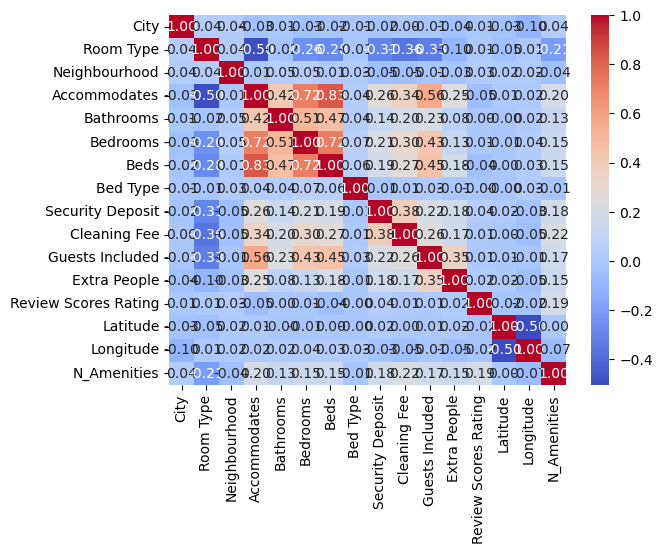

In [21]:
matriz_correlacion = X_train.corr()

sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

Veo que tanto la longitud como la latitud no muestra correlación lineal con el precio

In [22]:
X_train = X_train.drop('Latitude', axis=1)
X_train = X_train.drop('Longitude', axis=1)
X_test = X_test.drop('Latitude', axis=1)
X_test = X_test.drop('Longitude', axis=1)

In [23]:
# voy a obtener mis features o caracteristicas
features = X_train.columns
features

Index(['City', 'Room Type', 'Neighbourhood', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Review Scores Rating',
       'N_Amenities'],
      dtype='object')

In [24]:
X_train.dtypes

City                      int32
Room Type                 int32
Neighbourhood             int32
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Bed Type                  int32
Security Deposit        float64
Cleaning Fee            float64
Guests Included           int64
Extra People              int64
Review Scores Rating    float64
N_Amenities             float64
dtype: object

Una vez dividido y analizado mi dataset, voy a intentar hacer la selección de mis variables con RandomForest

Fitting 5 folds for each of 19 candidates, totalling 95 fits


C:\Users\Drakharys\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best mean cross-validation score: 0.087
best parameters: {'max_depth': 4}


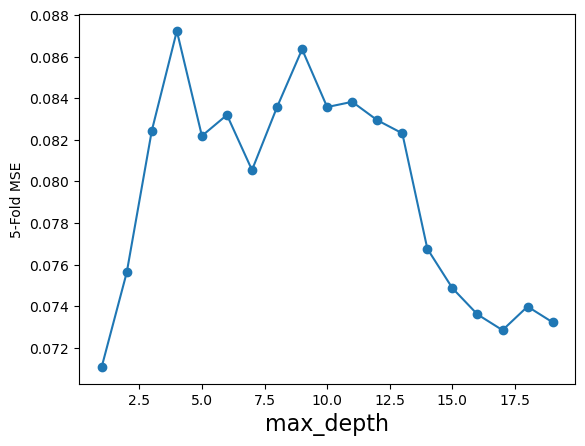

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Yo voy a optar por hacer dropna
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# Hago validación cruzada para saber la profundidad
max_depth = range(1, 20)
param_grid = {'max_depth': max_depth }
grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5, verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [26]:
maxDepthOptimo =10 #grid.best_params_['max_depth'] 
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.21133695240499936
Test:  0.21133695240499936


Entrenado un poco el arbol de desición, voy a ver qué pasa si hago ahora sí RandomForest y Baggins

Fitting 5 folds for each of 19 candidates, totalling 95 fits


C:\Users\Drakharys\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best mean cross-validation score: 0.107
best parameters: {'base_estimator__max_depth': 15}


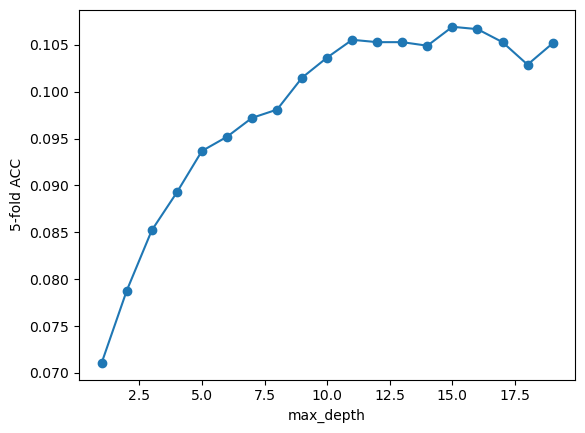

In [27]:
from sklearn.ensemble import BaggingClassifier

# grid search
maxDepth = range(1,20)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=150), param_grid=tuned_parameters,cv=5,verbose=1) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold ACC')

plt.show()

In [28]:
maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
baggingModel = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.892437823507133
Test:  0.892437823507133


C:\Users\Drakharys\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best mean cross-validation score: 0.113
best parameters: {'max_depth': 13}


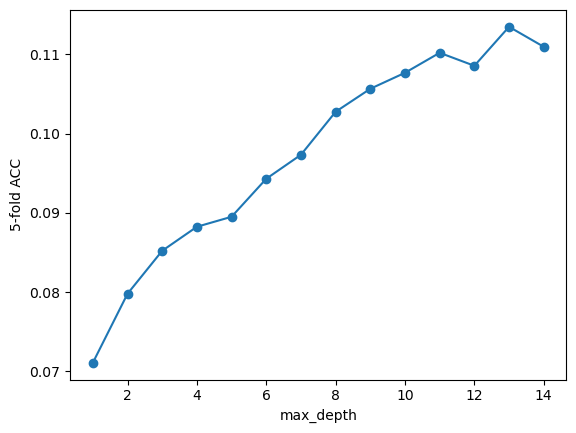

In [29]:
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold ACC')

plt.show()

In [30]:
maxDepthOptimo = 12 #grid.best_params_['max_depth'] Me quedo con 12 por disminuir profundidad y evitar la complejidad
randomForest = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.705340234818836
Test:  0.705340234818836


Veo que RandomForest me dará mejores resultados

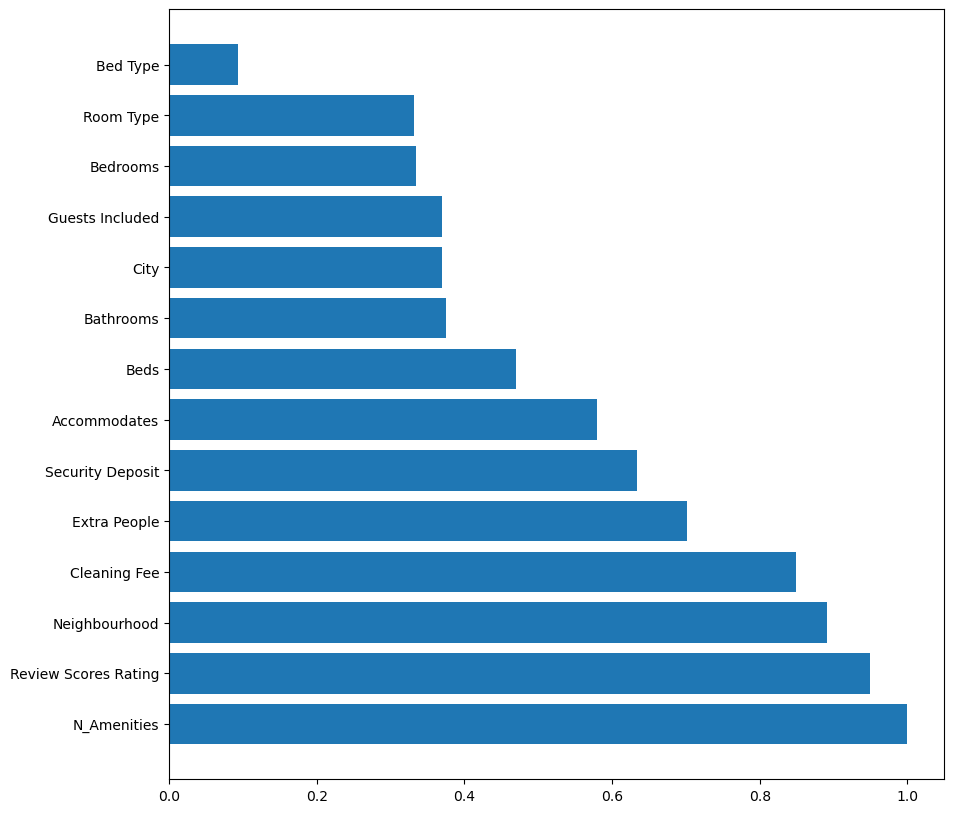

In [31]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Veo que las variables que mejor podrán ayudarme con mi modelo serian todos excepto Bed type

In [32]:
from sklearn.model_selection import KFold

N,Nfeatures = X_train.shape

rf = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt')
kf  = KFold(n_splits=5, shuffle = True, random_state=1)
cv_error = []
cv_std = []

for nfeatures in range(Nfeatures,0,-1):
        
    error_i = []
    
    for idxTrain, idxVal in kf.split(X_train):
        
        Xt = X_train.iloc[idxTrain, :].values
        yt = y_train.iloc[idxTrain].values
        Xv = X_train.iloc[idxVal, :].values
        yv = y_train.iloc[idxVal].values
        
        rf.fit(Xt,yt)
        
        ranking = rf.feature_importances_
        indices = np.argsort(ranking)[::-1] 
    
        selected = indices[0:(Nfeatures-nfeatures+1)]
        
        Xs = Xt[:,selected]
        
        rf.fit(Xs,yt)
        error = (1.0-rf.score(Xv[:,selected],yv))     
        error_i.append(error) 
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str(len(selected)) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

# features 1 error 0.9574547525730491 +/- 0.0022817927397577997
# features 2 error 0.9691959022400664 +/- 0.0015649712965509902
# features 3 error 0.9580855877385845 +/- 0.003288719570324448
# features 4 error 0.9287964821718765 +/- 0.003085795645171587
# features 5 error 0.919957700028678 +/- 0.00929509329376859
# features 6 error 0.9123838543160309 +/- 0.0073876915089016535
# features 7 error 0.9006431826147914 +/- 0.004195135142797204
# features 8 error 0.8987482076283339 +/- 0.01047825056057204
# features 9 error 0.8977394608546028 +/- 0.005340065735197805
# features 10 error 0.8925634101265016 +/- 0.0036209489734288047
# features 11 error 0.893572953509862 +/- 0.008747128044614926
# features 12 error 0.8897857120096868 +/- 0.007893152981230162
# features 13 error 0.8900391135328043 +/- 0.0035359572090864436
# features 14 error 0.8866297039798617 +/- 0.00685356343569458


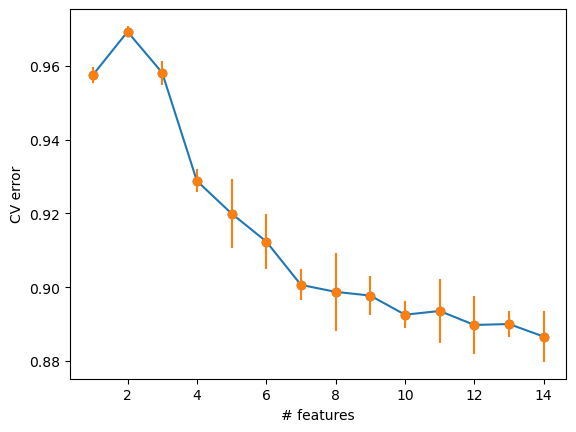

In [33]:
plt.plot(range(1,Nfeatures+1,1),cv_error,'-o')
plt.errorbar(range(1,Nfeatures+1,1), cv_error, yerr=cv_std, fmt='o')
plt.xlabel('# features')
plt.ylabel('CV error')
plt.show()

Pues estos resultados me dejan desanimada... de momento es lo mejor que puedo hacer y voy a continuar.
Ahora voy a entrenar el algoritmo con las características seleccionadas

In [34]:
selected_features = indices[0:13] #Aqui pongo el número de características que he visto serían mejor 

maxDepthOptimo = grid.best_params_['max_depth']

X_train_selected = X_train.iloc[:, selected_features].values
X_test_selected = X_test.iloc[:, selected_features].values

randomForest = RandomForestClassifier(max_depth=maxDepthOptimo, n_estimators=200, max_features='sqrt').fit(X_train_selected, y_train)

print("Train: ", randomForest.score(X_train_selected, y_train))
print("Test: ", randomForest.score(X_test_selected, y_test))

Train:  0.7889155409670496
Test:  0.7889155409670496


In [35]:
# Voy a ver qué características han sido seleccionadas
for sf in selected_features:
    print(features[sf])

N_Amenities
Review Scores Rating
Neighbourhood
Cleaning Fee
Extra People
Security Deposit
Accommodates
Beds
Bathrooms
Guests Included
City
Bedrooms
Room Type


Ahora voy a entrenar los modelo en sí

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END .......................................

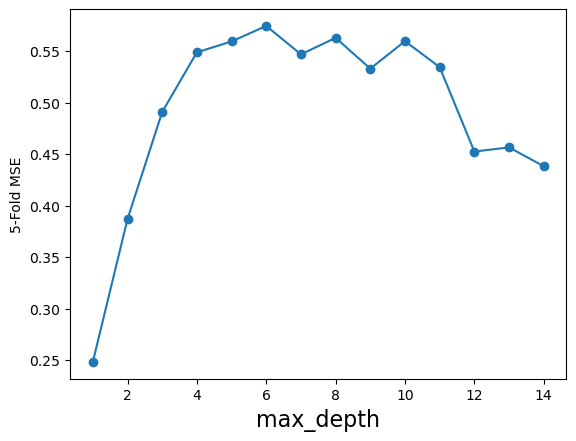

In [36]:
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [37]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.6859543799788629
Test:  0.6859543799788629


Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END .......................................

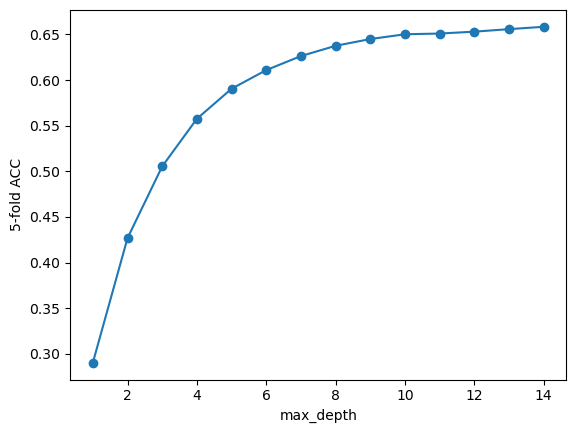

In [38]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold ACC')

plt.show()

In [39]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.9025997552164354
Test:  0.9025997552164354


Parece que finalmente el modelo tiene unas buenas prestaciones, prosigo y aplico el modelo 

In [40]:
y_hat= randomForest.predict(X_test)
print("y_hat:", y_hat[:5])
print("y_test:", y_test[:5])

y_hat: [78.3031044  61.31390532 34.68324279 68.84218441 63.67294309]
y_test: 4706    85.0
6422    49.0
4339    33.0
1666    35.0
6278    59.0
Name: Price, dtype: float64


### CONCLUSION

Después de haber estado trasteando con todos los datasets de las clases, probando y luchando contra errores que me parecían chino, he de decir que para trabajar este, al menos he entendido los errores y he sabido subsanarlos relativamente fácil. Quizás me he entretenido demasiado a la hora de explorar las variables de este airbnb pero sino no me sentía satisfecha con lo siguiente que hacía, aún así he quitado de lo que vi con otras variables porque no creo que aportaran gran cosa a la resolución del problema.
Finalmente, a pesar de que cuando he llegado a la selección de variables creía que lo estaba haciendo fatal por tan bajo accuracy, pero al llegar a aplicar los modelos con esas variables yo me siento satisfecha, tanto el árbol de decisiones como el Random Forest creo que he conseguido un score acceptable para predecir el precio.

Gracias por darme esta oportunidad de aprender!